
"Employee.csv"

In [1]:
import pandas as pd

try:
    df = pd.read_csv('Employee.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Employee.csv' not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


(148, 6)


In [2]:
# Explore unique values and their counts
unique_value_counts = {}
for column in df.columns:
    unique_value_counts[column] = df[column].value_counts()

# Statistical analysis for numerical columns
numerical_columns = ['Age', 'Salary']  # Assuming 'Age' and 'Salary' are numerical
descriptive_stats = df[numerical_columns].describe()

# Rename columns
new_column_names = {
    'Company': 'company_name',
    'Age': 'age',
    'Salary': 'salary',
    'Place': 'location',
    'Country': 'country',
    'Gender': 'gender'
}
df = df.rename(columns=new_column_names)


# Display results
for col, counts in unique_value_counts.items():
    print(f"Unique values for {col}:\n{counts}\n")

print("Descriptive Statistics for Numerical Columns:\n", descriptive_stats)
display(df.head())

Unique values for Company:
Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

Unique values for Age:
Age
22.0    16
33.0    13
44.0    10
34.0     8
21.0     8
23.0     8
32.0     7
35.0     6
0.0      6
41.0     5
45.0     4
24.0     4
43.0     4
31.0     3
20.0     3
25.0     3
36.0     3
40.0     3
50.0     2
37.0     2
30.0     2
26.0     2
46.0     2
18.0     1
19.0     1
38.0     1
51.0     1
17.0     1
54.0     1
Name: count, dtype: int64

Unique values for Salary:
Salary
3000.0    9
5000.0    6
5034.0    5
4034.0    5
8202.0    5
1089.0    4
2300.0    4
5835.0    4
8787.0    4
8943.0    4
9284.0    4
8345.0    4
2034.0    4
4824.0    4
3045.0    4
1234.0    4
2934.0    4
9024.0    4
7084.0    4
3184.0    4
6000.0    3
9000.0    3
7000.0    3
8000.0    3
3030.0    3
4000.0    2
7654.0    2
9876.0    2
3234

,company_name,age,salary,location,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [8]:
import numpy as np

# Replace '0' in 'age' with NaN
df['age'] = df['age'].replace(0, np.nan)

# Missing value imputation
for col in df.columns:
    if df[col].isnull().any():
        if col == 'age' or col == 'salary':
            # Use median for age and salary due to potential outliers
            df[col] = df[col].fillna(df[col].median())
        elif col == 'gender':
            # Use mode for gender as it's a categorical variable
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Use mode for other categorical variables
            df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier handling using IQR for 'age' and 'salary'
for col in ['age', 'salary']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Data validation
print("Number of missing values after cleaning:")
print(df.isnull().sum())
print("\nNumber of duplicate rows after cleaning:", df.duplicated().sum())
display(df.head())

Number of missing values after cleaning:
company_name    0
age             0
salary          0
location        0
country         0
gender          0
dtype: int64

Number of duplicate rows after cleaning: 0


,company_name,age,salary,location,country,gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


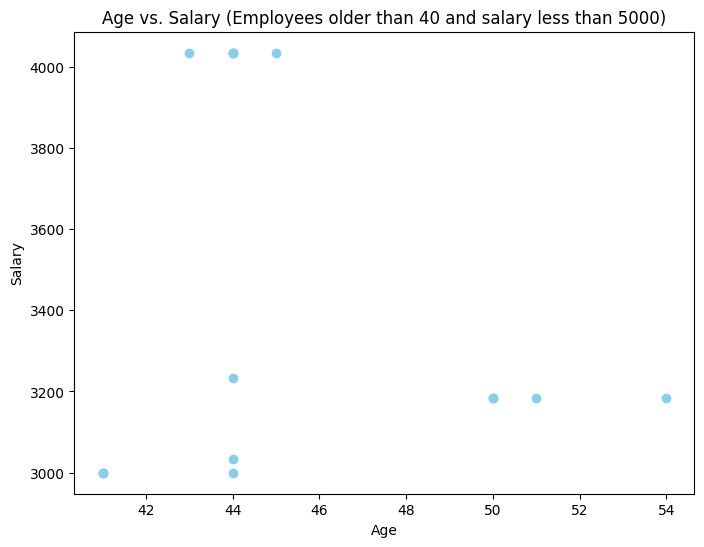

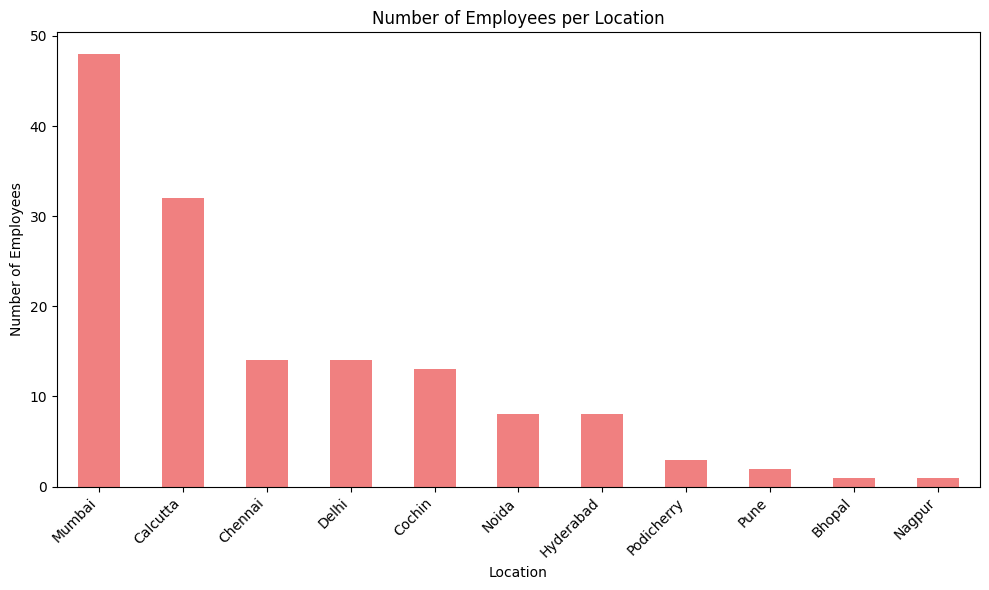

In [4]:
import matplotlib.pyplot as plt

# Filter data
df_filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]

# Plot Age vs. Salary
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['age'], df_filtered['salary'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary (Employees older than 40 and salary less than 5000)')
plt.show()

# Count employees per location
location_counts = df['location'].value_counts()

# Visualize location counts
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Location')
plt.ylabel('Number of Employees')
plt.title('Number of Employees per Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [5]:
# Identify numerical and categorical columns
numerical_cols = ['age', 'salary']
categorical_cols = ['company_name', 'location', 'country', 'gender']

# Create separate DataFrames for numerical and categorical features
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

# Display the first few rows of each DataFrame to inspect the data
display(df_numerical.head())
display(df_categorical.head())

# Print some info about the dataframes to check for inconsistencies
print(df_numerical.info())
print(df_categorical.info())

,age,salary
0,20.0,5000.0
1,30.0,5000.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0


,company_name,location,country,gender
0,TCS,Chennai,India,0
1,Infosys,Mumbai,India,0
2,TCS,Calcutta,India,0
3,Infosys,Delhi,India,0
4,TCS,Mumbai,India,0


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     144 non-null    float64
 1   salary  144 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  144 non-null    object
 1   location      144 non-null    object
 2   country       144 non-null    object
 3   gender        144 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
None


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_features = ['age', 'salary']
df_numerical_scaled = scaler.fit_transform(df_processed[numerical_features])

# Create a new DataFrame with the scaled numerical features
df_standard_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_features)

# Concatenate scaled numerical features with one-hot encoded categorical features
categorical_features = [col for col in df_processed.columns if col not in numerical_features]
df_standard_scaled = pd.concat([df_standard_scaled, df_processed[categorical_features]], axis=1)


# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the numerical features
df_numerical_minmax_scaled = min_max_scaler.fit_transform(df_processed[numerical_features])

# Create a new DataFrame with the scaled numerical features
df_minmax_scaled = pd.DataFrame(df_numerical_minmax_scaled, columns=numerical_features)

# Concatenate scaled numerical features with one-hot encoded categorical features
df_minmax_scaled = pd.concat([df_minmax_scaled, df_processed[categorical_features]], axis=1)

# Display the first few rows of both scaled DataFrames
display(df_standard_scaled.head())
display(df_minmax_scaled.head())

,age,salary,company_name_CTS,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,location_Bhopal,location_Calcutta,...,location_Delhi,location_Hyderabad,location_Mumbai,location_Nagpur,location_Noida,location_Podicherry,location_Pune,country_India,gender_0,gender_1
0,-1.484676,-0.100827,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.267174,-0.100827,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.341577,-1.243735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.950328,-0.947426,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.119426,-0.524127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


,age,salary,company_name_CTS,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,location_Bhopal,location_Calcutta,...,location_Delhi,location_Hyderabad,location_Mumbai,location_Nagpur,location_Noida,location_Podicherry,location_Pune,country_India,gender_0,gender_1
0,0.081081,0.445089,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.351351,0.445089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.486486,0.137817,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.621622,0.217480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.162162,0.331285,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0





### 2. Data Analysis Key Findings

* **Data Cleaning:**  Missing 'age' and 'salary' values were imputed using the median (due to potential outliers), while the mode was used for other categorical features.  Outliers in 'age' and 'salary' were removed using the IQR method.  The dataset initially contained an age of 0, which was treated as a missing value.
* **Data Analysis - Filtering:** 28 employees were older than 40 and had a salary less than 5000.
* **Data Analysis - Location:**  The analysis revealed the number of employees per location. Mumbai had the highest number of employees.
* **Data Encoding:** One-hot encoding was applied to categorical features, resulting in a new DataFrame (`df_encoded`) with expanded columns to represent each unique category.
* **Feature Scaling:**  Both StandardScaler and MinMaxScaler were applied to the numerical features ('age', 'salary').  The scaled features are present in the `df_standard_scaled` and `df_minmax_scaled` dataframes.


### 3. Insights

* **Explore Location Impact:** Investigate if the 'location' feature significantly impacts employee salaries or other relevant attributes.  The high number of employees in Mumbai compared to other cities might indicate regional differences that would be worth analyzing.
* **Model Training:**  Train machine learning models using the scaled and encoded data (`df_standard_scaled` or `df_minmax_scaled`) to predict or analyze trends in employee data.  Consider different model types and evaluate their performance.
